In [1]:
import os
import matplotlib.pyplot as plt
import re
import sys
import numpy as np
from scipy.stats import norm
import scipy.integrate as integrate
import math 
import pandas as pd

font_size=20
lw=4
line_w=lw

myblue = (0,119/235,187/235)
myred=(187/235,85/235,102/235)
myyellow=(221/235,170/235,51/235)
mygrey=(187/235,187/235,187/235)
mygreen="#66BB55"
mymagenta="#7733DD"
myblack="#48494B"
import matplotlib.ticker as mtick
plt.rc('xtick', labelsize=font_size) 
plt.rc('ytick', labelsize=font_size) 
def openCfile(file):
    """
    Open the C txt file in order to obtain m_1 matrix of results 
    -----------
    Input
    -----------
    file: txt file
        m_1 file containing the results from the C simulation

    Return
    -----------
    mat: list of list
        m_1 matrix containing the results of the simulations 
    """
    with open(file) as f:
        cols = f.readlines() #columns in the txt file
    n_col = len(cols) #number of columns in the text file
    mat=[] # matrix 
    for i in range(n_col): # for each columns 
        elems_i=cols[i].split(" ") #split the elements using " "
        col_i=[] #create an empty column i 
        for elem in elems_i: #for each element of the list 
            if elem!="\n" and elem!=" ": #compare each elements and discard " " and "\n"
                col_i.append(float(elem)) #append elems that are floats to the vector of interest
        mat.append(col_i) #create the matrix
    mat=np.array(mat)
    return(mat) #return the value of the matrix.


## Plot your potential and adaptive funciton 

In [2]:
#####################
## Set the parameters 
######################
tau=5
T=100
M1=1
m1=0.1
dtlist =np.array([0.01,0.001,0.0001])

## Set your path 
path="/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/C/underdamped/spring_validate/v1/"
# set the same list of dt that you set in your c++ file
c=2
def U(x):
    res = -x*x+pow((c*abs(x)-5),-2)
    return res


Text(0.5, 1.0, 'g(x)')

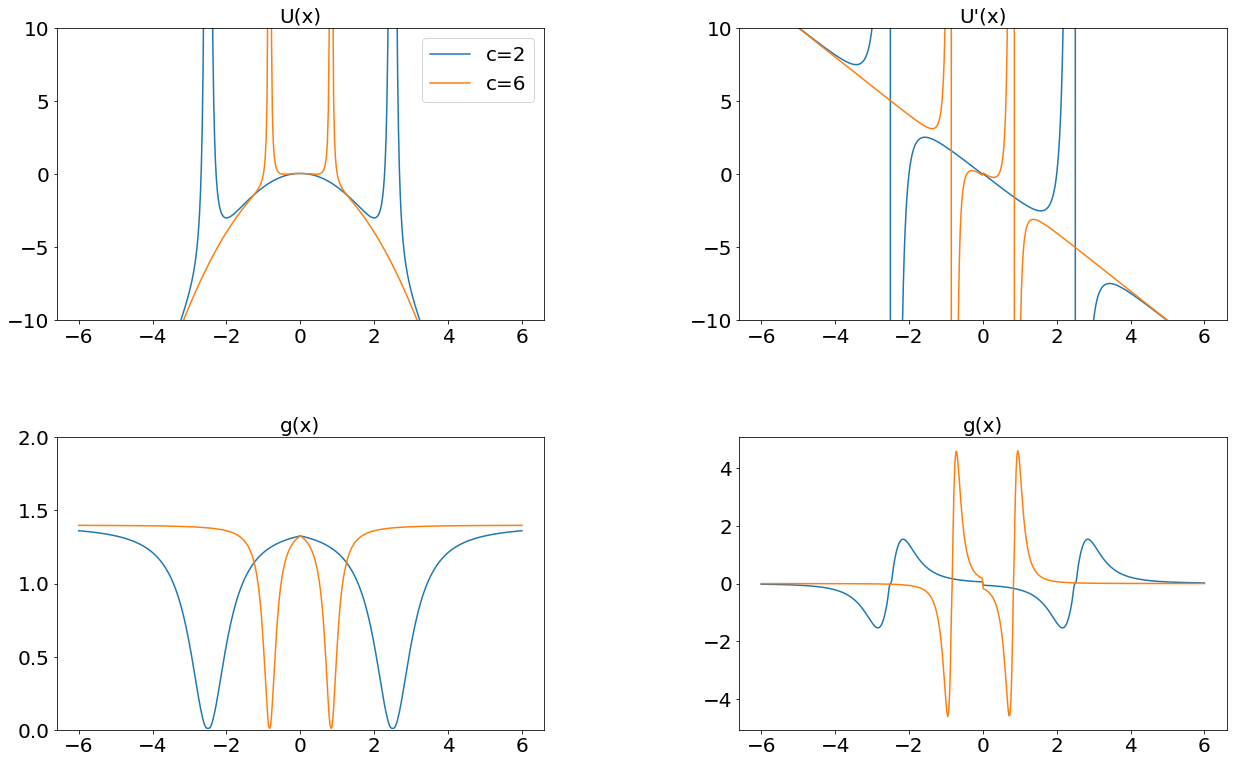

In [3]:
m1=0.0001
M1=1/1.4
def Utry(x,c):
    res = -x*x+pow((c*abs(x)-5),-2)
    return res

def Uptry(x,c):
    res = -2*x-2*c/np.power((c*abs(x)-5),3)*x/abs(x)
    return res

def getg(x,c):
    f=1/(c*abs(x)-5)**2;
    f2=f*f;
    xi=np.sqrt(1+m1*f2);
    den=M1*xi+np.sqrt(f2);
    g=xi/den;
    return(g)

def getgprime(x,c):
    f=1/(c*abs(x)-5)**2;
    f2=f*f;
    fp=-2*c/np.power((c*abs(x)-5),3)*x/abs(x)
    xi=np.sqrt(1+m1*f2);
    gp=-xi*xi*fp/(pow(xi,3)*pow(M1*xi+f,2));
    return(gp)



fig, (axs)= plt.subplots(2,2,figsize=(25,15))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.25,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

s=np.linspace(-6.,6,500)
axs[0,0].plot(s,Utry(s,2),label="c=2")
# axs[0,0].plot(s,Utry(s,4),label="c=4")
axs[0,0].plot(s,Utry(s,6),label="c=6")
axs[0,0].set_ylim(-10,10)
axs[0,0].set_title("U(x)",fontsize=font_size)
axs[0,0].legend(fontsize=font_size)

axs[0,1].plot(s,Uptry(s,2),label="c=2")
# axs[0,1].plot(s,Uptry(s,4),label="c=4")
axs[0,1].plot(s,Uptry(s,6),label="c=6")
axs[0,1].set_ylim(-10,10)
axs[0,1].set_title("U'(x)",fontsize=font_size)

axs[1,0].plot(s,getg(s,2),label="c=2")
# axs[1,0].plot(s,getg(s,4),label="c=4")
axs[1,0].plot(s,getg(s,6),label="c=6")
axs[1,0].set_ylim(0,2)
axs[1,0].set_title("g(x)",fontsize=font_size)

axs[1,1].plot(s,getgprime(s,2),label="c=2")
# axs[1,0].plot(s,getg(s,4),label="c=4")
axs[1,1].plot(s,getgprime(s,6),label="c=6")
# axs[1,1].set_ylim(0,2)
axs[1,1].set_title("g(x)",fontsize=font_size)



## Look at histograms 


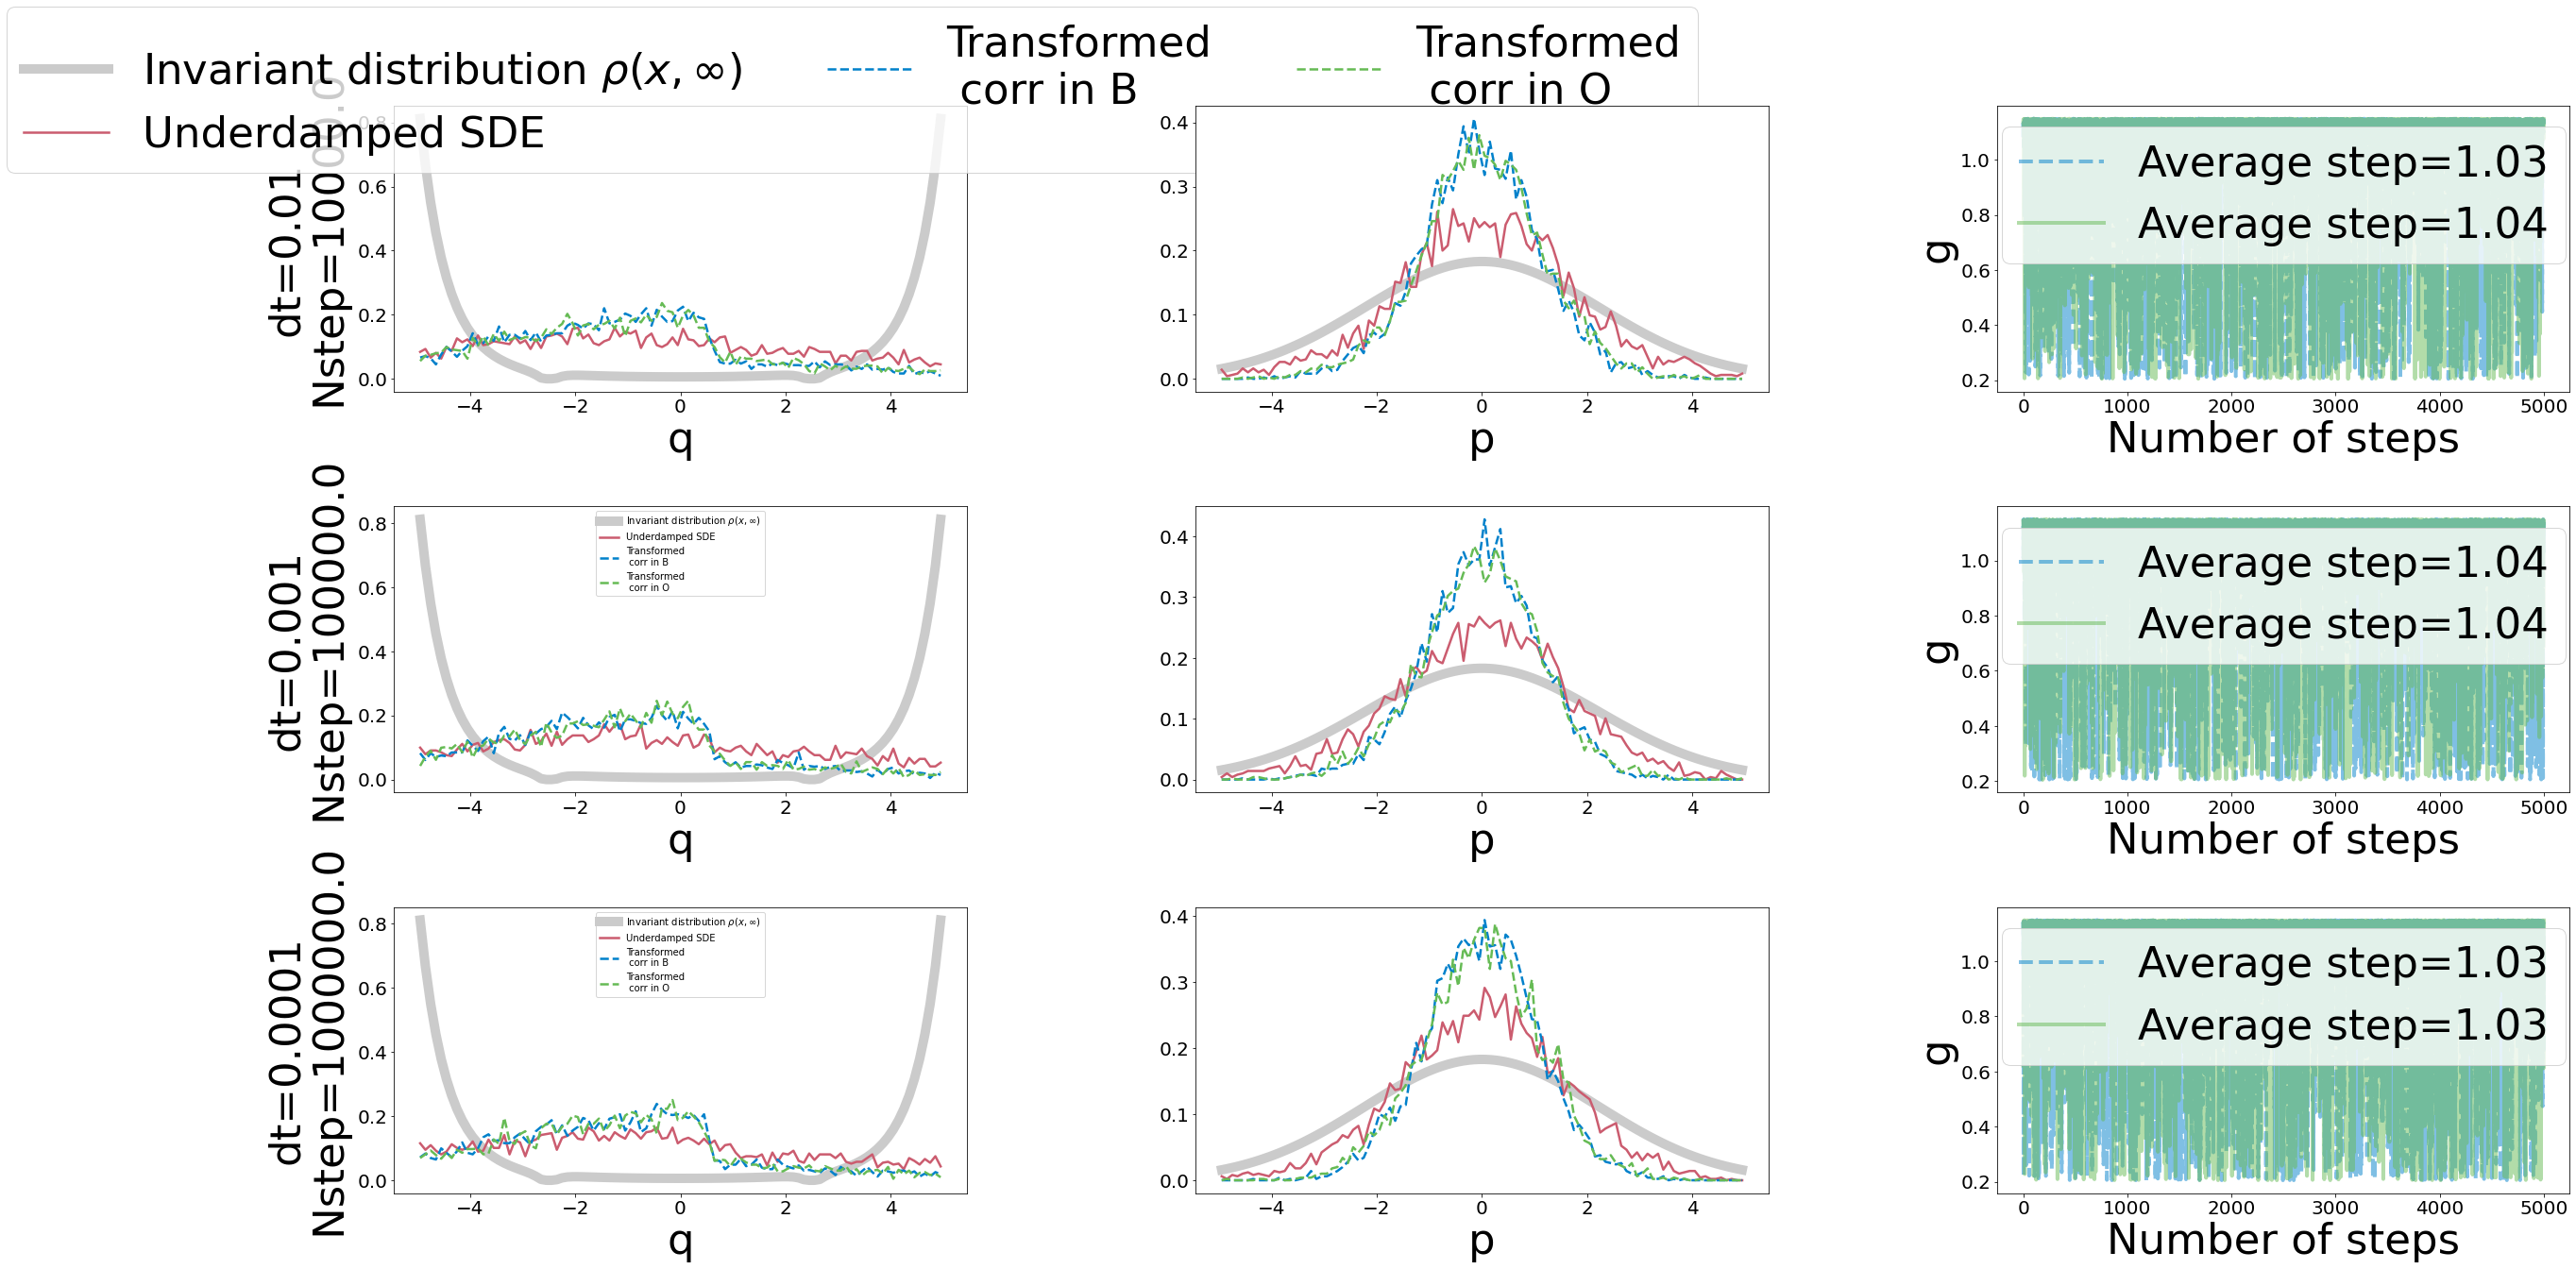

In [4]:
numsam = len(dtlist)
fig, ((axs))= plt.subplots(numsam,3,figsize=(40,20))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
nbins=100
rg=5
T=100

range_bins=[-rg,rg]
font_size=45

for i in range(numsam):
    filename= path+"vec_noada_qi="+str(i)+".txt"
    q_noada=np.hstack(openCfile(filename))
    filename= path+"vec_noada_pi="+str(i)+".txt"
    p_noada=np.hstack(openCfile(filename))

    # Correction step in O
    filename= path+"vec_tr_O_qi="+str(i)+".txt"
    q_tr_O=np.hstack(openCfile(filename))
    filename= path+"vec_tr_O_pi="+str(i)+".txt"
    p_tr_O=np.hstack(openCfile(filename))
    filename= path+"vec_tr_O_gi="+str(i)+".txt"
    g_O=np.hstack(openCfile(filename))

    # Correction step in B 
    filename= path+"vec_tr_B_qi="+str(i)+".txt"
    q_tr_B=np.hstack(openCfile(filename))
    filename= path+"vec_tr_B_pi="+str(i)+".txt"
    p_tr_B=np.hstack(openCfile(filename))
    filename= path+"vec_tr_B_gi="+str(i)+".txt"
    g_B=np.hstack(openCfile(filename))


    t=np.linspace(0,len(q_noada),len(q_noada))

    ############
    ## Q vals ## 
    ############
    # SDE
    histogram_sde,bins = np.histogram(q_noada,bins=nbins,range=range_bins, density=True)
    midx_sde = (bins[0:-1]+bins[1:])/2

    # transformed - correction in B
    histogram_tr_B,bins = np.histogram(q_tr_B,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # transformed - correction in O
    histogram_tr_O,bins = np.histogram(q_tr_O,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # Invariant distribution
    rho = np.exp(- U(midx_sde)/tau)
    rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

    axs[i,0].plot(midx_sde,rho,linewidth=10,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
    axs[i,0].plot(midx_sde,histogram_sde,"-",linewidth=2.5,label='Underdamped SDE',color=myred)
    axs[i,0].plot(midx_tr,histogram_tr_B,"--",linewidth=2.5,label='Transformed\n corr in B',color=myblue)
    axs[i,0].plot(midx_tr,histogram_tr_O,"--",linewidth=2.5,label='Transformed\n corr in O',color=mygreen)
    axs[i,0].legend()
    axs[i,0].set_xlabel("q",fontsize=font_size)
    axs[i,0].set_ylabel("dt="+str(dtlist[i])+"\n Nstep="+str((T/dtlist[i])),fontsize=font_size)


    ############
    ## P vals ## 
    ############

        # SDE
    histogram_sde,bins = np.histogram(p_noada,bins=nbins,range=range_bins, density=True)
    midx_sde = (bins[0:-1]+bins[1:])/2

    # transformed - B
    histogram_tr_B,bins = np.histogram(p_tr_B,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # transformed - O
    histogram_tr_O,bins = np.histogram(p_tr_O,bins=nbins,range=range_bins, density=True)
    midx_tr = (bins[0:-1]+bins[1:])/2

    # Invariant distribution
    rho = np.exp(- midx_sde*midx_sde/(2*tau))
    rho = rho / (np.sum(rho)* (midx_sde[1]-midx_sde[0]) ) # Normalize rho by dividing by its approx. integral

    axs[i,1].plot(midx_sde,rho,linewidth=10,label='Invariant distribution $\\rho(x,\\infty)$',color=mygrey)
    axs[i,1].plot(midx_sde,histogram_sde,"-",linewidth=2.5,label='Underdamped SDE',color=myred)
    axs[i,1].plot(midx_tr,histogram_tr_B,"--",linewidth=2.5,label='Transformed\n corr in B',color=myblue)
    axs[i,1].plot(midx_tr,histogram_tr_O,"--",linewidth=2.5,label='Transformed\n corr in O',color=mygreen)
    axs[i,1].set_xlabel("p",fontsize=font_size)

    ############
    ## Histograms g vals ## 
    ############
    range_bins_g=[0,M1+0.1]
    midx_noada = (bins[0:-1]+bins[1:])/2

    # Underdamped: corr in B
    histogram_g_B,bins = np.histogram(g_B,bins=nbins,range=range_bins_g, density=True)
    mean_g_B=round(np.mean(g_B),2)

    # Underdamped: corr in O
    histogram_g_O,bins = np.histogram(g_O,bins=nbins,range=range_bins_g, density=True)
    mean_g_O=round(np.mean(g_O),2)

    axs[i,2].plot(t,g_B,"--",linewidth=lw,alpha=0.5,label='Average step='+str(mean_g_B),color=myblue)
    axs[i,2].plot(t,g_O,linewidth=lw,alpha=0.5,label='Average step='+str(mean_g_O),color=mygreen)
    axs[i,2].legend(fontsize=font_size, loc="upper center")
    axs[i,2].set_ylabel("g", fontsize=font_size)
    axs[i,2].set_xlabel("Number of steps", fontsize=font_size)


axs[0,0].legend(fontsize=font_size,loc="upper center",ncol=3,bbox_to_anchor=(0.8, 1.42))


In [131]:
def U(x):
    res = -x*x+pow((c*abs(x)-5),-2)
    return res

range_int=[0.0000000001,5] #not divisible by zero but symetric around 0, so 2*(0,100) for pair moments and zero for not pair moments

r0=range_int[0]
r1=range_int[1]
norm=np.round(integrate.quad(lambda q: np.exp(-U(q)/tau), r0,r1)[0],16)
true_mom_1 = 0 # np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q), r0,r1)[0],16)/norm
true_mom_2 = (np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q, r0,r1)[0],16)/norm)
true_mom_3 = 0 # np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*(q)**3, r0,r1)[0],16)/norm
true_mom_4 = np.round(integrate.quad(lambda q: np.exp(-U(q)/tau)*q*q*q*q, r0,r1)[0],16)/norm
print(true_mom_2)

19.50175399905202


[0.26865671 0.24523864 0.107277  ]
[ 0.33899486 -0.0308232   0.22033272]
[17.51298925 17.42232902 17.2683822 ]


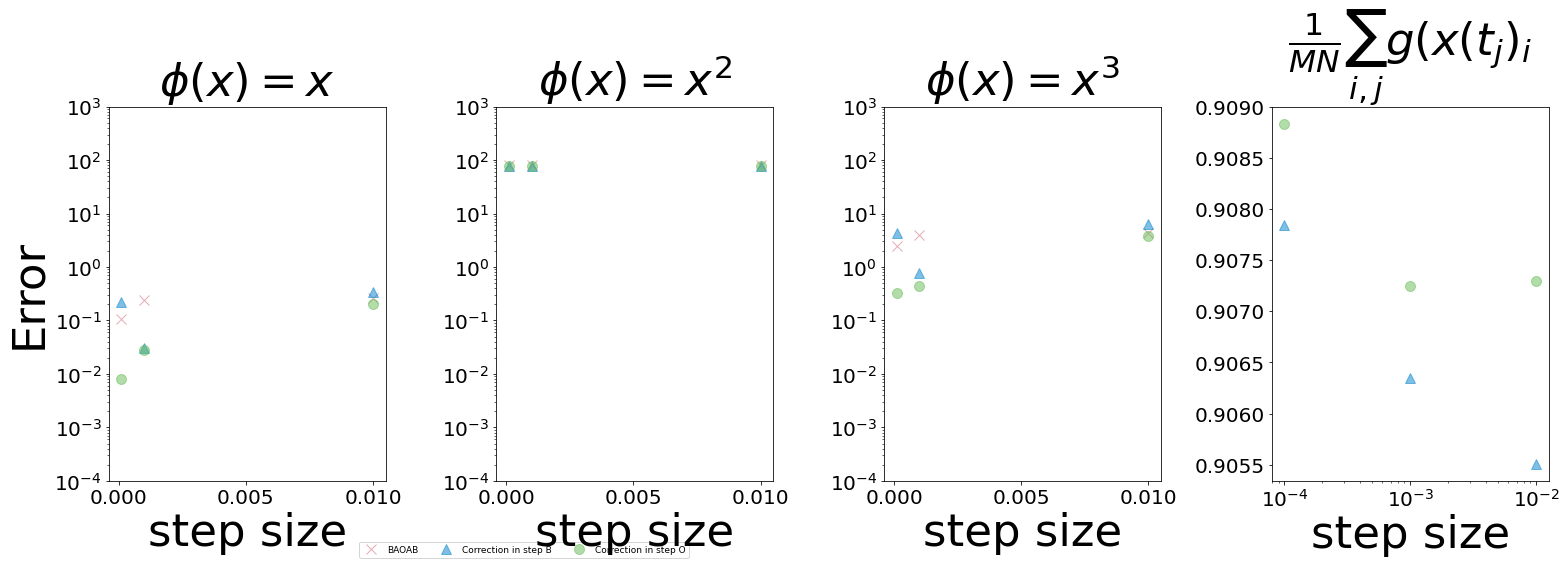

In [124]:
# from settings_and_potential_eddie import *

# ###########################################
# ## Set up the path
# ###########################################
# os.chdir("/home/s2133976/OneDrive/ExtendedProject/Code/Stepupyourgame/Stepupyourgame/data/eddie")
path1=path
# ###########################################
# ## Interpolate the slope
# ###########################################

xm=dtlist

# ###########################################
# ## Compute the log moments
# ###########################################
fig, (ax1,ax2,ax3,ax4)= plt.subplots(1,4,figsize=(25,8))# plt.figure(figsize=(4,4))
fig.subplots_adjust(left=0.1,bottom=0.25, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
mksize=10
## no adaptive 
###############
lab="BAOAB"
mom1_list,mom2_list,mom3_list=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"noada_moment1.txt"))
mom2_list=np.hstack(openCfile(path1+"noada_moment2.txt"))
mom3_list=np.hstack(openCfile(path1+"noada_moment3.txt"))

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)

#Plot moments
ax1.semilogy(xm,(mom1_list),"x",alpha=0.5,markersize=mksize,color=myred,label=lab)
ax2.semilogy(xm,(mom2_list),"x",alpha=0.5,markersize=mksize,color=myred,label=lab)
ax3.semilogy(xm,(mom3_list),"x",alpha=0.5,markersize=mksize,color=myred,label=lab)
print(mom1_list)

## Transformed correction in B 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step B"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1B.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2B.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3B.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4B.txt"))
print(mom1_list)

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"^",alpha=0.5,markersize=mksize,color=myblue,label=lab)
ax2.semilogy(xm,(mom2_list),"^",alpha=0.5,markersize=mksize,color=myblue,label=lab)
ax3.semilogy(xm,(mom3_list),"^",alpha=0.5,markersize=mksize,color=myblue,label=lab)
ax4.semilogx(xm,(gvals),"^",alpha=0.5,markersize=mksize,color=myblue,label=lab)


## Transformed correction in O 
################################
# lab="$\\hat{\\rm{B}}\\hat{\\rm{A}}\\rm{O}\\hat{\\rm{A}}\\hat{\\rm{B}}$"
lab = "Correction in step O"
mom1_list,mom2_list,mom3_list,gvals=np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist)),np.zeros(len(dtlist))

# Upload moments
mom1_list=np.hstack(openCfile(path1+"tr_moment1O.txt"))
mom2_list=np.hstack(openCfile(path1+"tr_moment2O.txt"))
mom3_list=np.hstack(openCfile(path1+"tr_moment3O.txt"))
gvals=np.hstack(openCfile(path1+"tr_moment4O.txt"))
print(mom2_list)

mom1_list=np.abs(mom1_list-true_mom_1)
mom2_list=np.abs(mom2_list-true_mom_2)
mom3_list=np.abs(mom3_list-true_mom_3)
# mom4_list=np.abs(mom4_list-true_mom_4)

ax1.semilogy(xm,(mom1_list),"o",alpha=0.5,markersize=mksize,color=mygreen,label=lab)
ax2.semilogy(xm,(mom2_list),"o",alpha=0.5,markersize=mksize,color=mygreen,label=lab)
ax3.semilogy(xm,(mom3_list),"o",alpha=0.5,markersize=mksize,color=mygreen,label=lab)
ax4.semilogx(xm,(gvals),"o",alpha=0.5,markersize=mksize,color=mygreen,label=lab)


########################################################
## Presentation of the plots ###########################
########################################################
ax1.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax2.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5
ax3.set_ylim([10**(-4),10**3]) #change to -7.5 for a=2.5


#label of y axis 
ax1.set_title("$\\phi(x)=x$",fontsize=font_size)
ax2.set_title("$\\phi(x)=x^2$",fontsize=font_size)
ax3.set_title("$\\phi(x)=x^3$",fontsize=font_size)
ax4.set_title("$\\frac{1}{M N}\\sum_{i,j} g(x(t_j)_i$",fontsize=font_size)

# label of y axis
ax1.set_ylabel("Error",fontsize=font_size)
# ax2.set_ylabel("Error",fontsize=font_size)
# ax3.set_ylabel("Error",fontsize=font_size)
# ax4.set_ylabel("$y$",fontsize=font_size)

# ax4.set_ylabel("$\\log_{\\rm{e}}(x)$",fontsize=font_size)


# label of x axis
ax1.set_xlabel("step size",fontsize=font_size)
ax2.set_xlabel("step size",fontsize=font_size)
ax3.set_xlabel("step size",fontsize=font_size)
ax4.set_xlabel("step size",fontsize=font_size)

ax1.legend(fontsize=font_size*0.2,ncol=6,loc="upper center",bbox_to_anchor=(1.5, -0.15))
